In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Read the input dataset
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheetname='Data')

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
# Column descriptions

##	Data Description:								
##									
##	ID	Customer ID							
##	Age	Customer's age in completed years							
##	Experience	#years of professional experience							
##	Income	Annual income of the customer ($000)							
##	ZIPCode	Home Address ZIP code.							
##	Family	Family size of the customer							
##	CCAvg	Avg. spending on credit cards per month ($000)							
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	Mortgage	Value of house mortgage if any. ($000)							
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
##	Securities Account	Does the customer have a securities account with the bank?							
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
##	Online	Does the customer use internet banking facilities?							
##	CreditCard	Does the customer use a credit card issued by UniversalBank?							

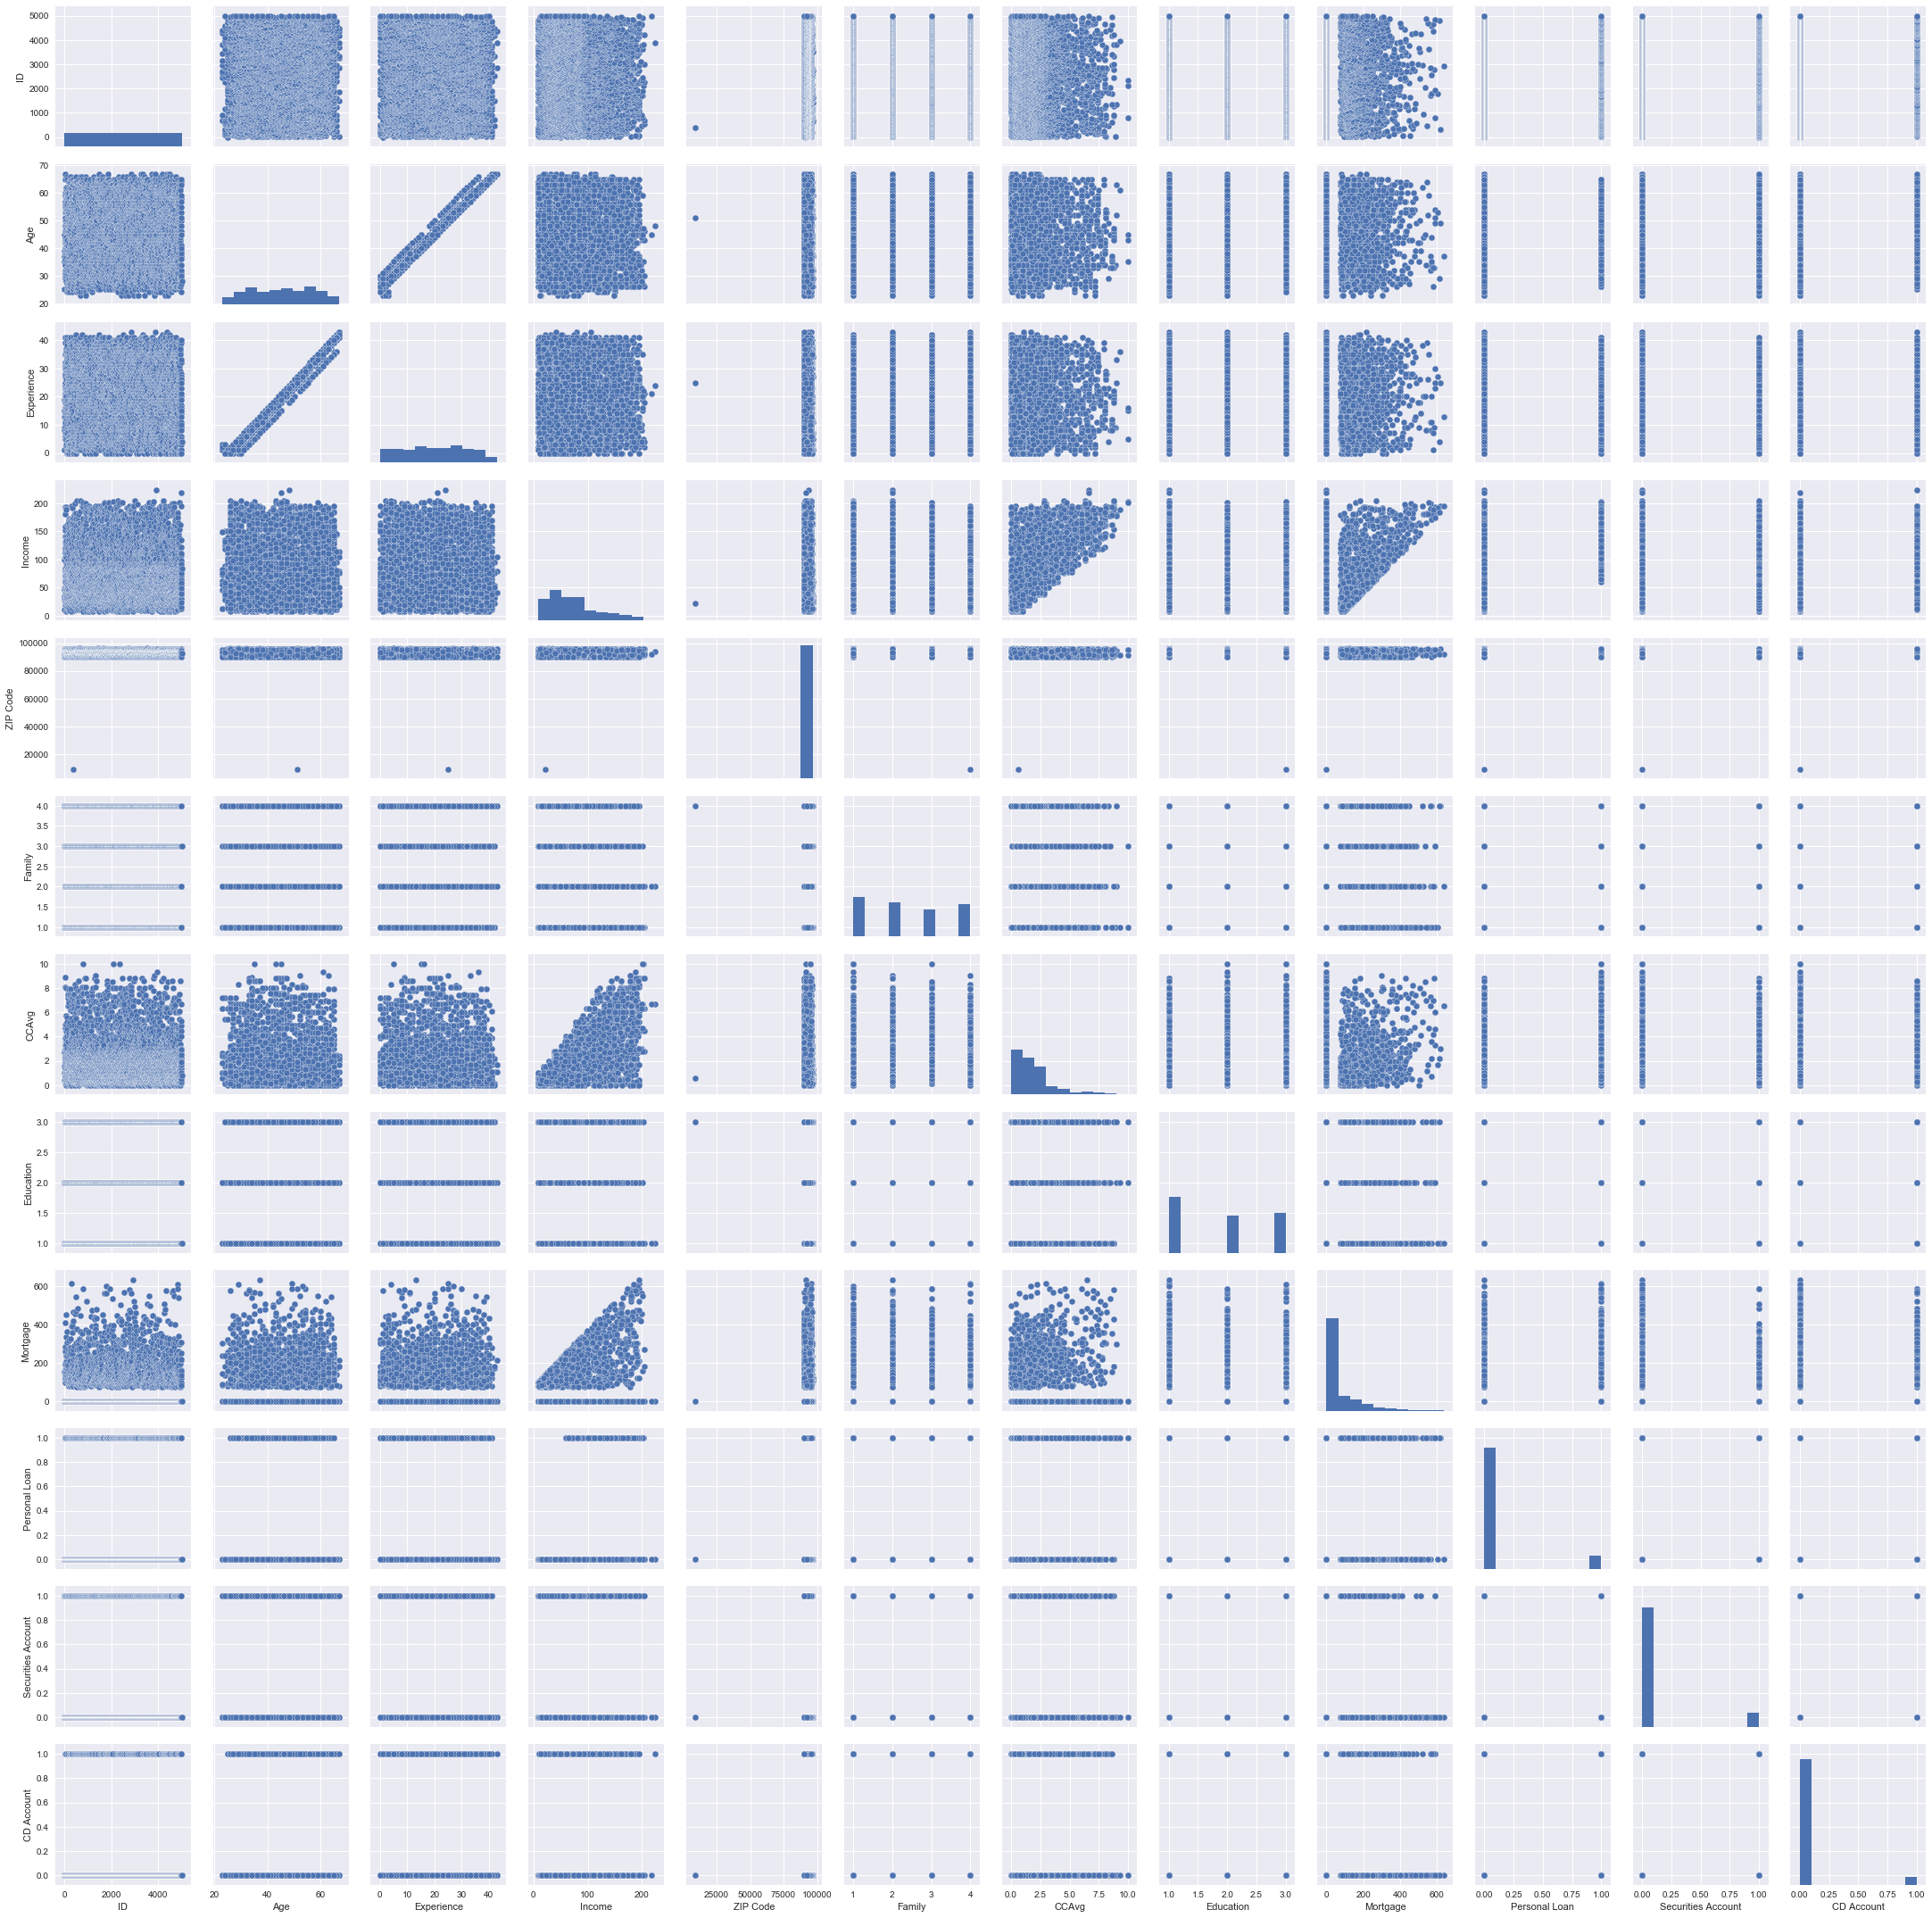

In [9]:
#importing seaborn for statistical plots
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [10]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship

In [11]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
df.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


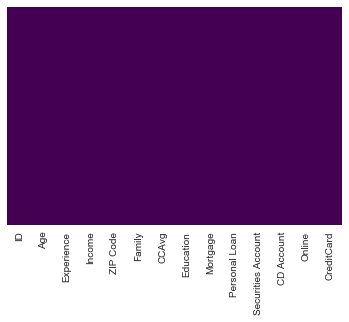

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
abc1= pd.crosstab(df['Education'], df['Personal Loan'], margins= True)
abc1
#In this table, we came to know that 2003 persons who belons to undergraduate they didnt opt for personal loan where as 93 
#person opt for personal loan plan, and 1221 persons who belons to graduate they didnt opt for personal loan where as 182 
#person opt for personal loan plan same as 1296 persons who belons to professional they didnt opt for personal loan where as 205 
#person opt for personal loan plan
#This means education level is directly proportional to personal loan.

Personal Loan,0,1,All
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
All,4520,480,5000


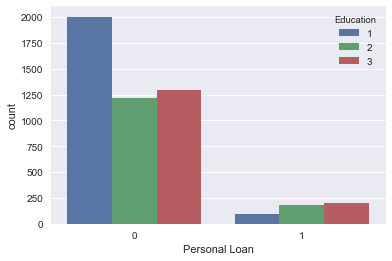

In [15]:
sns.countplot(x="Personal Loan", hue= "Education", data=df)

In [16]:
pd.crosstab(df['Securities Account'], df['Personal Loan'], margins= True)

Personal Loan,0,1,All
Securities Account,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


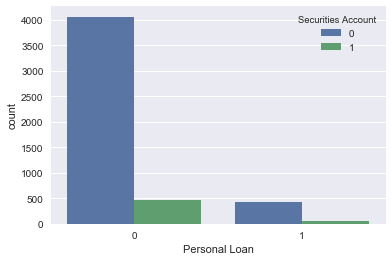

In [17]:
sns.countplot(x="Personal Loan", hue= "Securities Account", data=df)

In [18]:
pd.crosstab(df['CD Account'], df['Personal Loan'], margins= True)

Personal Loan,0,1,All
CD Account,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


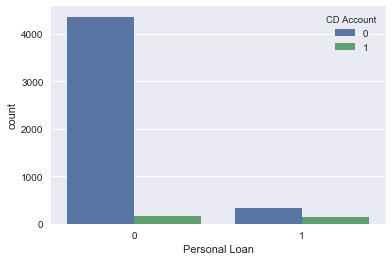

In [19]:
sns.countplot(x="Personal Loan", hue= "CD Account", data=df)

In [20]:
pd.crosstab(df['Online'], df['Personal Loan'], margins= True)

Personal Loan,0,1,All
Online,,,
0,1827,189,2016
1,2693,291,2984
All,4520,480,5000


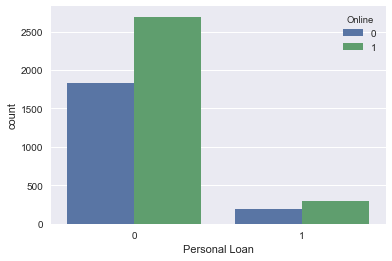

In [21]:
sns.countplot(x="Personal Loan", hue= "Online", data=df)

In [22]:
pd.crosstab(df['CreditCard'], df['Personal Loan'], margins= True)

Personal Loan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


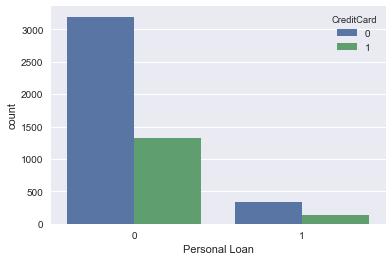

In [23]:
sns.countplot(x="Personal Loan", hue= "CreditCard", data=df)

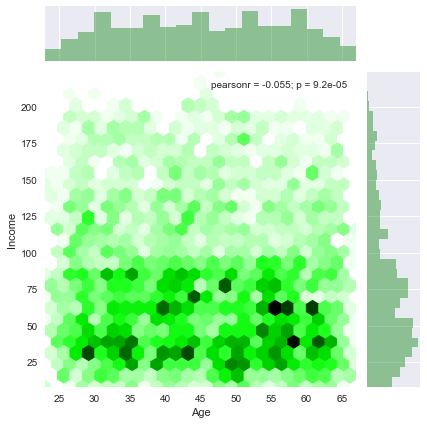

In [24]:
sns.jointplot(x='Age',y='Income',data=df,kind='hex',color='green')

C:\Users\bojha\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


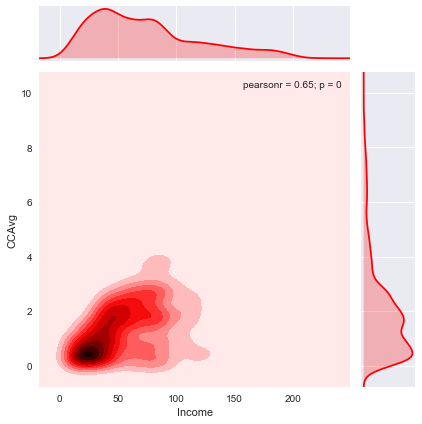

In [25]:
sns.jointplot(x='Income',y='CCAvg',data=df,color='red',kind='kde');

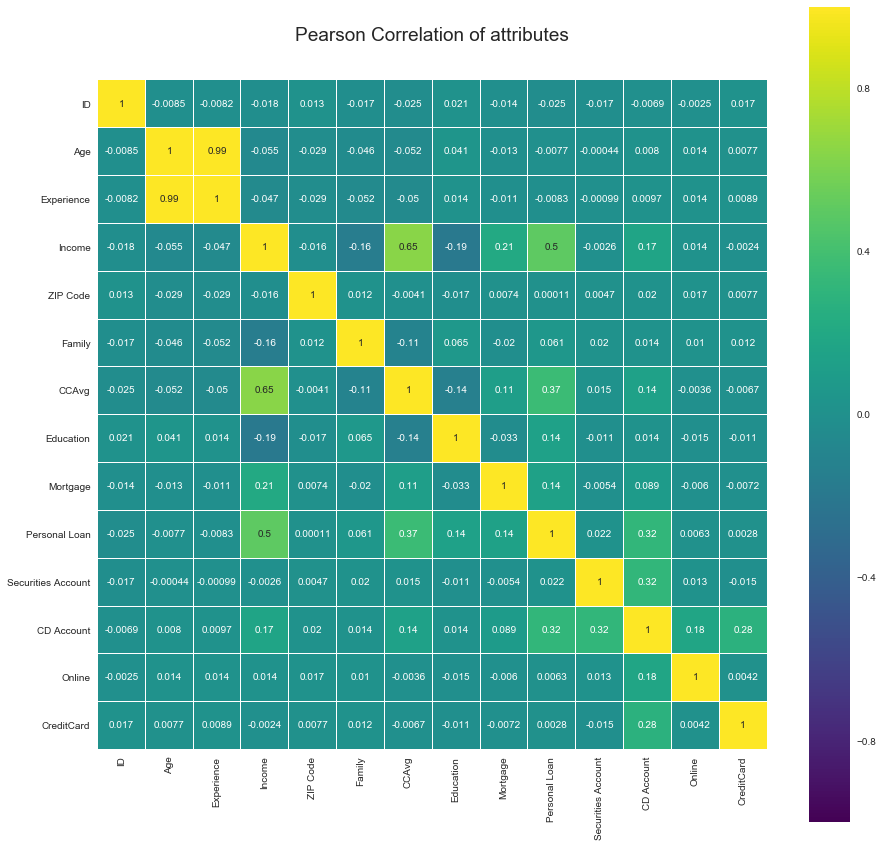

In [26]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#High corrlation in Age and Experience (Correlation coefficient of 0.99)
#Moderate correlation in Income and CCAvg (Correlation coefficient of 0.65)
#Perfect correlation between Age and Experience indicates that we may have to drop one of these predictors, before we build our model.

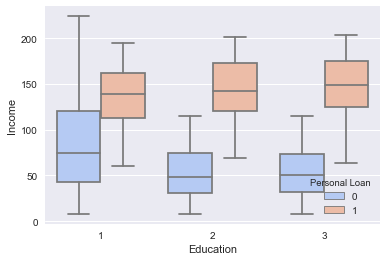

In [27]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan",data=df, palette="coolwarm")

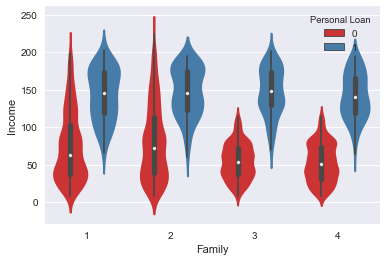

In [28]:
sns.violinplot(x="Family", y="Income", data=df,hue='Personal Loan',palette='Set1')

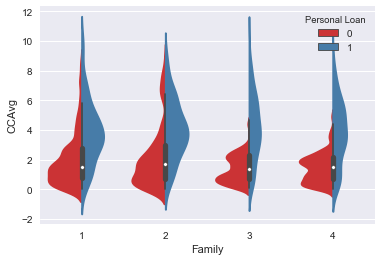

In [29]:
sns.violinplot(x="Family", y="CCAvg", data=df,hue='Personal Loan',split=True,palette='Set1')

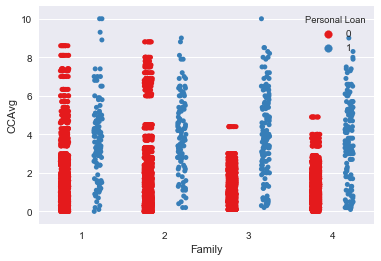

In [30]:
sns.stripplot(x="Family", y="CCAvg", data=df,jitter=True,hue='Personal Loan',palette='Set1',split=True)

In [31]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']

In [32]:
####### --------------------------- Logistic Model --------------------------------------

In [33]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [34]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9135
[[1770   46]
 [ 127   57]]


In [35]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1816
          1       0.55      0.31      0.40       184

avg / total       0.90      0.91      0.90      2000



In [36]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

In [37]:
###### ----------------------- Naive Bayes Model ---------------------------------

In [38]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]

target_labels = df.loc[:, df.columns == 'Personal Loan']


X_array = features.values
y_array = target_labels.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_array, y_array, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [39]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

predictions=model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [40]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94      1816
          1       0.47      0.60      0.53       184

avg / total       0.91      0.90      0.91      2000



In [41]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

In [42]:
#####  ------------------------------ K Nearest Neighbours ------------------------------------

In [43]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [44]:
predicted_labels = NNH.predict(X_test)

In [45]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1783   33]
 [ 169   15]]


In [46]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95      1816
          1       0.31      0.08      0.13       184

avg / total       0.86      0.90      0.87      2000



In [47]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [48]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [49]:
predicted_labels = NNH.predict(X_test_scaled)

In [50]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1809    7]
 [  78  106]]


In [51]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1816
          1       0.94      0.58      0.71       184

avg / total       0.96      0.96      0.95      2000



In [52]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

In [53]:
### ----------------------------------------- Desicion Tree ---------------------------------

In [54]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, y_df, test_size=test_size, random_state=seed)


dt_model = DecisionTreeClassifier(criterion = 'entropy' )   # try with gini index....
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [55]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                         Imp
ID                  0.020435
Age                 0.020459
Experience          0.007280
Income              0.511801
ZIP Code            0.007727
Family              0.136560
CCAvg               0.124087
Education           0.169746
Mortgage            0.001904
Securities Account  0.000000


In [56]:
dt_model.score(X_test , y_test)  # do not rely on the accuracy score when data is skewed

0.98250000000000004

In [57]:
y_predict = dt_model.predict(X_test)

In [58]:
print(metrics.confusion_matrix(y_test, y_predict))

[[1795   21]
 [  14  170]]


In [59]:
# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1816
          1       0.89      0.92      0.91       184

avg / total       0.98      0.98      0.98      2000



In [60]:
### Decision tree gives the best result for both class 0 and class 1
### Given the decision tree gives best result, let us try ensemble of trees 

y_train = np.ravel(y_train)   # converting y_train vector to single dimensional array
rfcl = RandomForestClassifier(random_state=1)

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=20)  #the base_estimator can be null.
#The bagging classifer  will build it's own tree

enclf = VotingClassifier(estimators = [('rf', rfcl), ('bg', bgcl)], voting = 'hard')

for clf, label in zip([rfcl, enclf, bgcl], ['RandomForest', 'Ensemble', 'Bagging']):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1816
          1       0.98      0.86      0.92       184

avg / total       0.99      0.99      0.99      2000

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1816
          1       0.99      0.85      0.92       184

avg / total       0.99      0.99      0.99      2000

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1816
          1       0.96      0.89      0.92       184

avg / total       0.99      0.99      0.99      2000



In [61]:
## In the ensemble technique, all are performing well in the class 1 category as they are are based on 
## Decision Tree. However, Bagging which is Bootstrap Aggregation is giving the best result for the 
## class 1

## The accuracy metric which is the overall model's peformance i.e. not class specific, can be misleading
# when the target classes are extremely skewed (i.e. do not have same no of samples). Always used the 
# recall and precision metric. Recall is, how many records of a class were correctly identified as 
# belonging to that class.  i.e. True Positive / (True Positive + False Negative)
# Precision is how many records identified as belonging to class 1 truly belong to class 1 i.e. 
# True Positive / (True Positive + False Positive)

# Make sure that your model peforms well on these metrics for all the classes, especially for the classes 
# which have lower representation in the skew